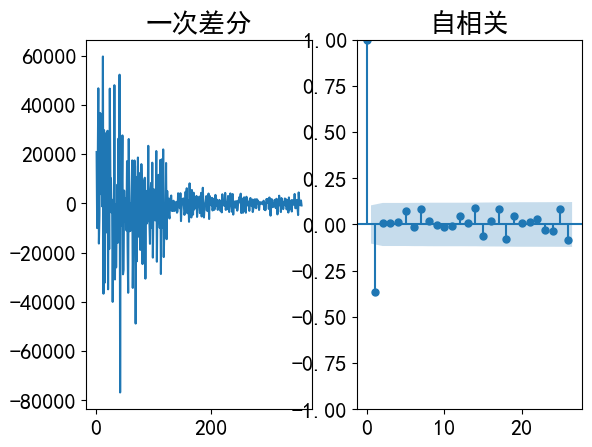

In [3]:
import pandas as pd, numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rc('axes',unicode_minus=False)
plt.rc('font',size=16); plt.rc('font',family='SimHei')
df=pd.read_csv('input3.csv')
plt.subplot(1,2,1); plt.plot(df.num.diff()) #差分
plt.title('一次差分')
ax2=plt.subplot(1,2,2)
plot_acf(df.lognum.diff().dropna(), ax=ax2,title='自相关') #dropna缺失值删除
plt.show()

                               SARIMAX Results                                
Dep. Variable:                 lognum   No. Observations:                  359
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 678.115
Date:                Sat, 18 Feb 2023   AIC                          -1350.231
Time:                        14:21:51   BIC                          -1338.589
Sample:                             0   HQIC                         -1345.601
                                - 359                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4178      0.045     -9.340      0.000      -0.505      -0.330
ar.L2         -0.1382      0.047     -2.920      0.003      -0.231      -0.045
sigma2         0.0013   7.37e-05     17.960      0.0

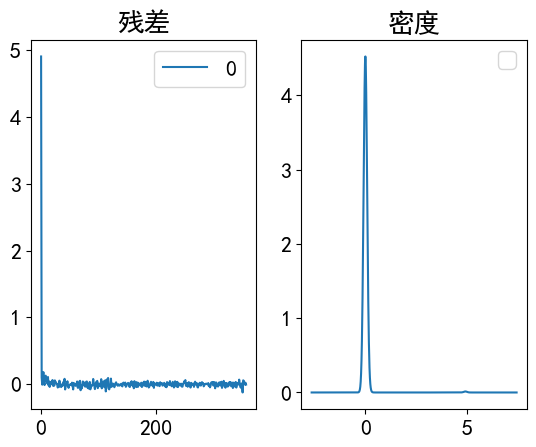

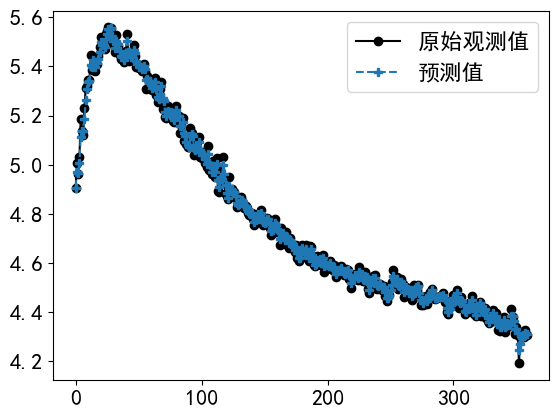

            0
1    0.099982
2   -0.008469
3    0.063564
4    0.179678
5    0.026573
..        ...
354  0.048229
355  0.007609
356 -0.007248
357  0.021826
358 -0.007092

[358 rows x 1 columns]
20563.727417062404
[17480.016507599517, 24191.44656410368]


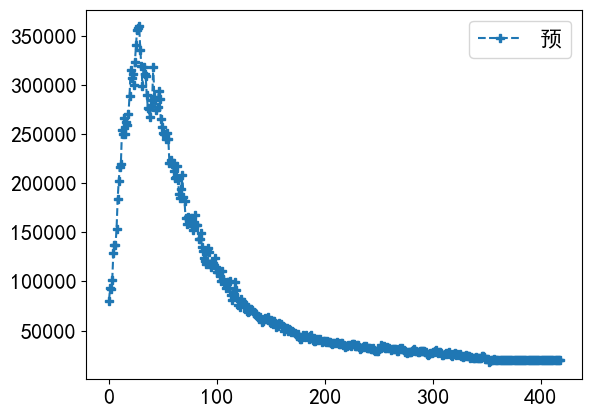

In [5]:
md=sm.tsa.arima.ARIMA(df.lognum, order=(2,1,0)).fit()
print(md.summary())


residuals = pd.DataFrame(md.resid) #计算残差
fig, ax = plt.subplots(1,2)
residuals.plot(title="残差", ax=ax[0])
residuals.plot(kind='kde', title='密度', ax=ax[1])
plt.legend(''); plt.ylabel('')          

zmd=md.predict(1,359)  #原始数据与预测值对比图
years=[0]
for i in range(0,359):
    years.append(i)
plt.figure()
plt.plot(years[1:],df.lognum,'o-k')
plt.plot(years[1:],zmd,'P--')
plt.legend(('原始观测值','预测值'))
plt.show()

print(residuals[1:])
    

tmd=md.predict(1,419)


k=[tmd[419]-1.96*0.036,tmd[419]+1.96*0.036]
print(10**tmd[419])
print([10**k[0],10**k[1]])
years2=[0]
for i in range(0,419):
    years2.append(i)

plt.figure()
plt.plot(years2[1:],10**tmd,'P--')
plt.legend(('预测值'))
plt.show()

In [3]:
print(md.resid)

0      4.906497
1      0.099982
2     -0.001472
3      0.071718
4      0.182921
         ...   
354    0.047070
355    0.026284
356   -0.006734
357    0.019103
358   -0.003951
Length: 359, dtype: float64


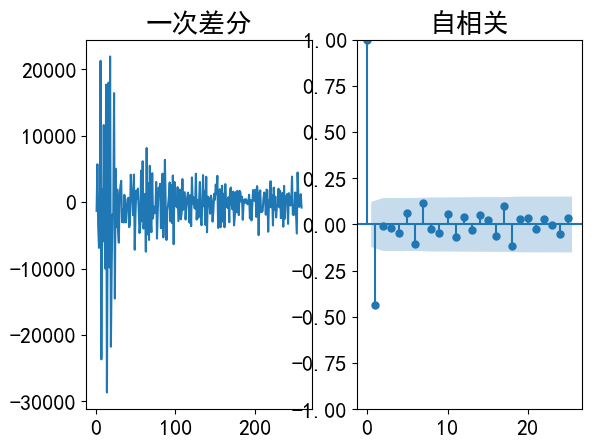

                               SARIMAX Results                                
Dep. Variable:                 lognum   No. Observations:                  260
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 529.216
Date:                Sat, 18 Feb 2023   AIC                          -1052.431
Time:                        14:35:34   BIC                          -1041.761
Sample:                             0   HQIC                         -1048.141
                                - 260                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5248      0.051    -10.265      0.000      -0.625      -0.425
ar.L2         -0.2266      0.050     -4.530      0.000      -0.325      -0.129
sigma2         0.0010   7.34e-05     13.387      0.0

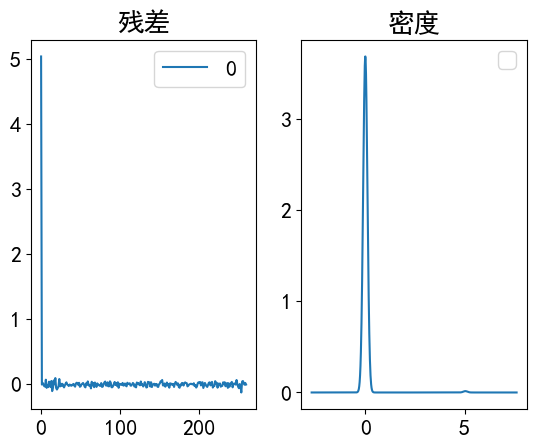

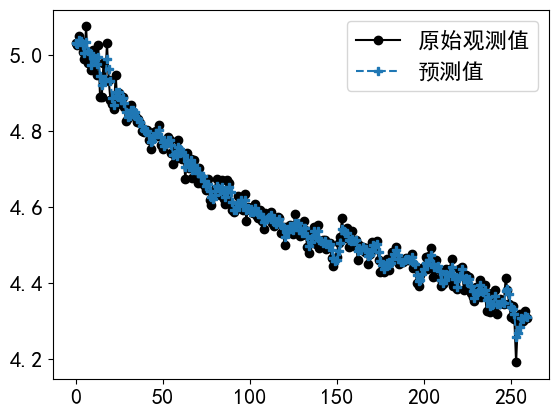

            0
1   -0.005284
2    0.020352
3   -0.003006
4   -0.030447
5   -0.035605
..        ...
255  0.049754
256  0.019258
257 -0.007247
258  0.020112
259 -0.004680

[259 rows x 1 columns]
20573.46780397053
[17887.411633007672, 23662.87454915811]


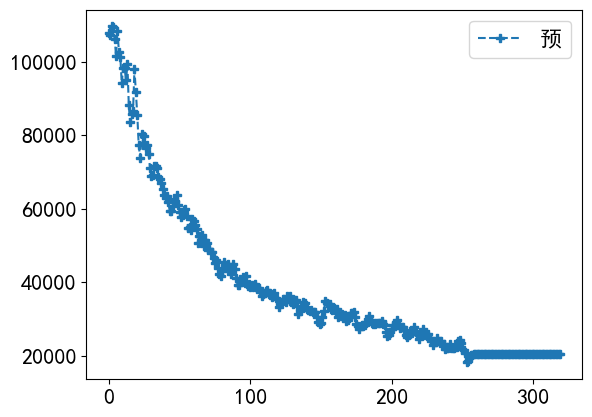

In [9]:
import pandas as pd, numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rc('axes',unicode_minus=False)
plt.rc('font',size=16); plt.rc('font',family='SimHei')
df2=pd.read_csv('input4.csv')
plt.subplot(1,2,1); plt.plot(df2.num.diff()) #差分
plt.title('一次差分')
ax2=plt.subplot(1,2,2)
plot_acf(df2.lognum.diff().dropna(), ax=ax2,title='自相关') #dropna缺失值删除
plt.show()

md2=sm.tsa.arima.ARIMA(df2.lognum, order=(2,1,0)).fit()
print(md2.summary())


residuals2 = pd.DataFrame(md2.resid) #计算残差
fig, ax = plt.subplots(1,2)
residuals2.plot(title="残差", ax=ax[0])
residuals2.plot(kind='kde', title='密度', ax=ax[1])
plt.legend(''); plt.ylabel('')          

zmd2=md2.predict(1,260)  #原始数据与预测值对比图
years3=[0]
for i in range(0,260):
    years3.append(i)
plt.figure()
plt.plot(years3[1:],df2.lognum,'o-k')
plt.plot(years3[1:],zmd2,'P--')
plt.legend(('原始观测值','预测值'))
plt.show()

print(residuals2[1:])
    

tmd2=md2.predict(1,320)


k=[tmd2[320]-1.96*0.031,tmd2[320]+1.96*0.031]
print(10**tmd2[320])
print([10**k[0],10**k[1]])
years4=[0]
for i in range(0,320):
    years4.append(i)

plt.figure()
plt.plot(years4[1:],10**tmd2,'P--')
plt.legend(('预测值'))
plt.show()